In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

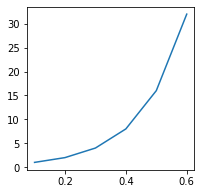

In [2]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
y = [1,2,4,8,16,32]
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(x,y)

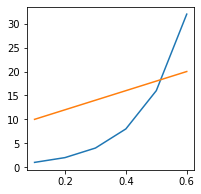

In [3]:
x2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
y2 = [10, 12, 14, 16, 18, 20]
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(x,y,x2,y2)

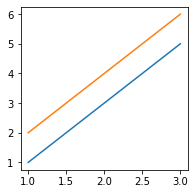

In [4]:
x = [1, 2, 3]
y = np.array([[1, 2], [3, 4], [5, 6]])
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(x, y)

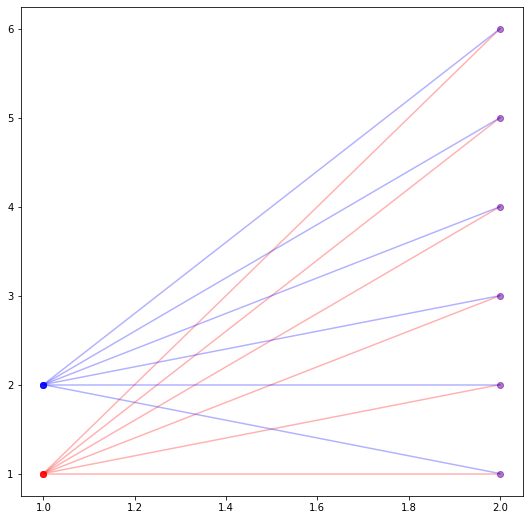

In [5]:
x = [1,2]
y = np.array([[1,1,1,1,1,1],[1,2,3,4,5,6]])
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(x, y,color='red',marker='o',alpha=0.3)
y = np.array([[2,2,2,2,2,2],[1,2,3,4,5,6]])
ax.plot(x, y,color='blue',marker='o',alpha=0.3)
plt.show()




layers 0 and 1    n_lines = 960
layers 1 and 2    n_lines = 9152
layers 2 and 3    n_lines = 74688
layers 3 and 4    n_lines = 601024
layers 4 and 5    n_lines = 1127360
layers 5 and 6    n_lines = 1192896
layers 6 and 7    n_lines = 1201088
layers 7 and 8    n_lines = 1201280

 final n_lines 1201280  




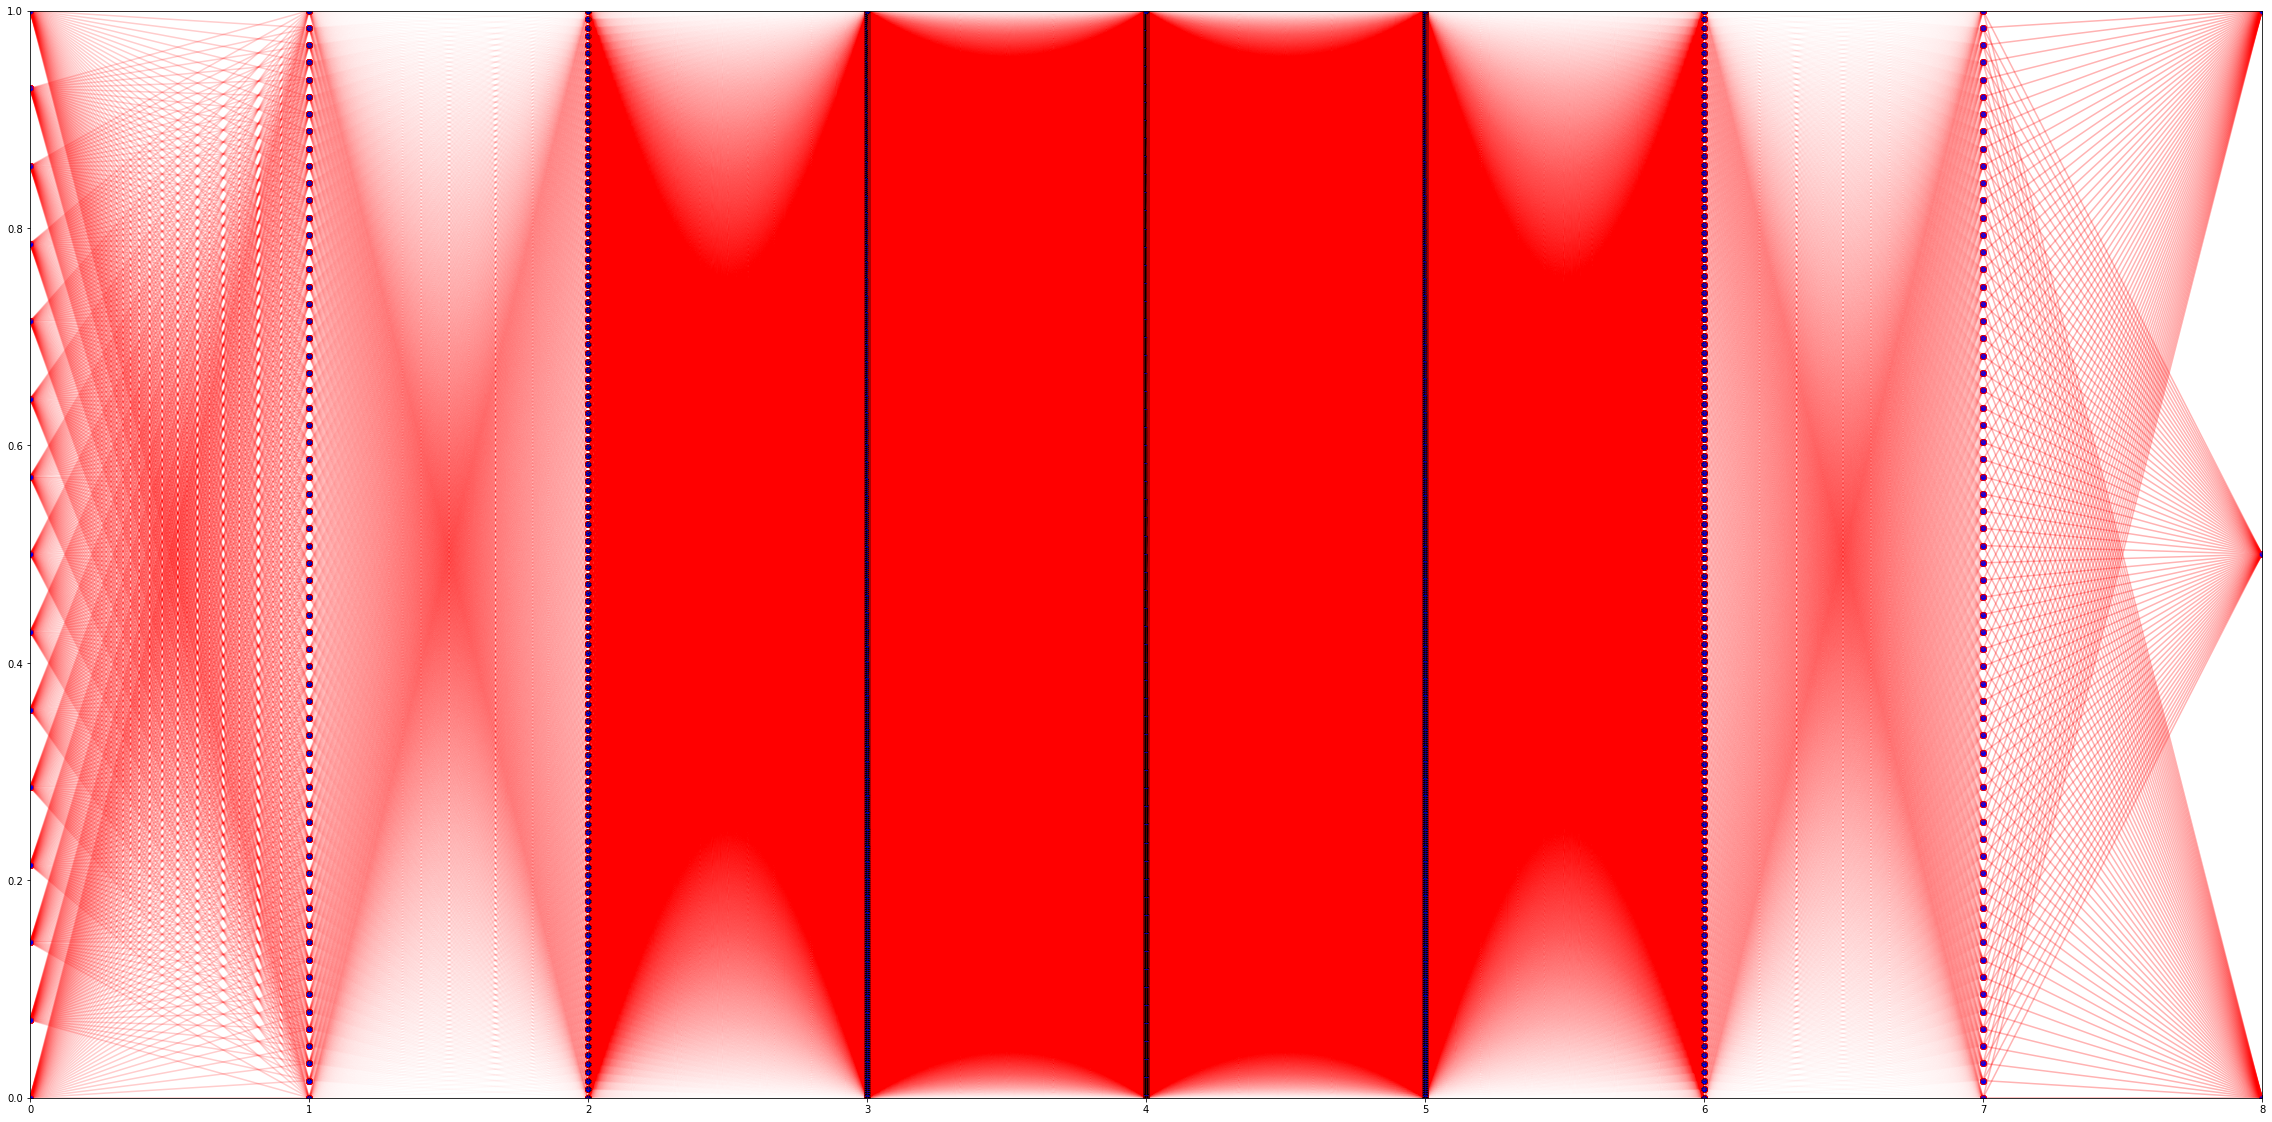

CPU times: user 35min 11s, sys: 8min 31s, total: 43min 43s
Wall time: 48min 7s


In [7]:

%%time

#%matplotlib notebook

fig, ax = plt.subplots(figsize=(40, 20))

nlayers = 5
nodes = [3,8,15,6,2]
alpha_vals = [0.3, 0.05, 0.05, 0.3]

nlayers = 5
nodes = [15,64,128,64,3]
alpha_vals = [0.3, 0.05, 0.05, 0.3]

#nlayers = 7
#nodes = [15, 64, 128, 512, 128, 64, 3]
#alpha_vals = [0.3, 0.05, 0.01, 0.01, 0.05, 0.3]

#-- fudge the widest layer (all a blur anyway)
#nlayers = 9
#nodes = [15, 64, 128, 512, 512, 512, 128, 64, 3]
#alpha_vals = [0.2, 0.02, 0.01, 0.01, 0.01, 0.01, 0.02, 0.3]

nlayers = 9
nodes = [15, 64, 128, 512, 1024, 512, 128, 64, 3]
alpha_vals = [0.2, 0.02, 0.01, 0.01, 0.01, 0.01, 0.02, 0.3]

plt.axis([0, (nlayers-1), 0, 1])

print('\n\n')

#plt.ion()

n_lines = 0

for li in range(nlayers-1):
    
    lai = li
    
    lbi = lai + 1
    
    print( 'layers %d and %d   ' % (lai, lbi), end='')
    
    for nai in range(nodes[lai]):
        
        #print('layer %2d  node %2d' % (lai, nai))
        
        ya = []
        yb = []
        for nbi in range(nodes[lbi]):
            
            ya.append( 1.*nai/(1.*nodes[lai]-1) )
            yb.append( 1.*nbi/(1.*nodes[lbi]-1) )
            
            n_lines = n_lines + 1
            
            # print('   node pair:  la %d  na %2d   with   lb %d nb %2d    ya %9.3f  yb %9.3f' % (lai, nai, lbi, nbi, ya[nbi], yb[nbi]))
        
        x = [lai, lbi]
        y = [ya,yb]
        
        ax.plot(x, y, color='red',marker='o', mfc='blue',alpha=alpha_vals[li])
        

    print( ' n_lines = %d' %  n_lines )
    
    #fig.canvas.draw()
    #fig.canvas.flush_events()
    #time.sleep(0.1)
    #plt.pause(0.05)
    

    
print('\n final n_lines %d  \n\n' % n_lines )

plt.savefig('network-diagram-%d-layers.png' % nlayers )

plt.show()